# Computer Vision Course Project

## Park Vision


### Setup

In [2]:
%pip install --quiet ultralytics scikit-learn opencv-python tqdm matplotlib pandas

Note: you may need to restart the kernel to use updated packages.


In [3]:
from ultralytics import YOLO #Handles YOLO class from YOLOV8 Library
from ultralytics.utils.plotting import Annotator #Annotator for bounding boxes and image labels

import cv2 #OpenCV

import os #Operating system (directories/files)
import shutil #High level file operations (ex. copy/delete directories)
import random #Used for randomly splitting or augmenting dataset
import xml.etree.ElementTree as ET #Parse/Manipulate XML files
from sklearn.model_selection import train_test_split #Used to split dataset into training validation and test sets
from tqdm import tqdm #Used to add progress bar to loops

import matplotlib.pyplot as plt #Image, chart plotter
import pandas as pd #Data analysis library

### Test YOLO and annotations are functioning correctly

YOLOv8n summary: 129 layers, 3,157,200 parameters, 0 gradients, 8.9 GFLOPs

image 1/1 /Users/aaron/Library/CloudStorage/OneDrive-Personal/University/Current Semester/Computer Vision - 4220/courseProject/ParkVision/06-object-detection-using-yolo/bus.jpg: 640x480 4 persons, 1 bus, 1 stop sign, 76.0ms
Speed: 4.8ms preprocess, 76.0ms inference, 6.8ms postprocess per image at shape (1, 3, 640, 480)


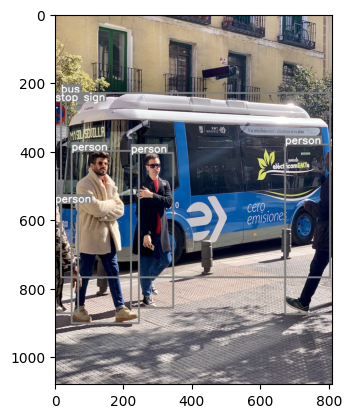

In [5]:
model = YOLO('06-object-detection-using-yolo/yolov8n.pt')
model.info()
results = model('06-object-detection-using-yolo/bus.jpg')


annotator = Annotator(cv2.cvtColor(results[0].orig_img, cv2.COLOR_BGR2RGB))
boxes = results[0].boxes
for box in boxes:
    b = box.xyxy[0]  # get box coordinates in (left, top, right, bottom) format
    c = box.cls
    annotator.box_label(b, model.names[int(c)])

plt.imshow(annotator.result())

### Setup the dataset